In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/2deezer2/-Auto-pricing-mashinki-/main/Data.csv')

#**Проверка гипотез**

**Гипотеза 1:** Чем новее модель автомобиля, тем выше цена на него.

Для проверки данной гипотезы можно использовать корреляционный анализ.

In [79]:
import numpy as np
from scipy.stats import pearsonr

data['Age'] = 2023 - data['Year']

# вычисление коэффициента корреляции Пирсона
corr, _ = pearsonr(data['Age'], data['Price'])

# вывод результата
if corr > 0:
    print('Есть положительная корреляция между возрастом модели и ценой на автомобиль')
else:
    print('Есть отрицательная корреляции между возрастом модели и ценой на автомобиль')
print(f'Коэффициент корреляции: {corr:.2f}')

Есть отрицательная корреляции между возрастом модели и ценой на автомобиль
Коэффициент корреляции: -0.56


Для определения статистической значимости и проверки нулевой гипотезы (нет корреляции между возрастом модели и ценой на автомобиль) можно использовать t-тест Стьюдента.

In [80]:
from scipy.stats import t
from numpy import sqrt

# вычисление длины выборки
n = len(data)

# вычисление значения t-статистики
t_stat = corr * sqrt(n - 2) / sqrt(1 - corr**2)

# определение уровня значимости для t-теста
alpha = 0.05

# определение критической области
cv = t.ppf(1 - alpha / 2, n - 2)

# вывод результата
if abs(t_stat) > cv:
    print('Корреляция между возрастом модели и ценой на автомобиль является статистически значимой')
else:
    print('Корреляция между возрастом модели и ценой на автомобиль не является статистически значимой')
print(f't-статистика: ', t_stat)

Корреляция между возрастом модели и ценой на автомобиль является статистически значимой
t-статистика:  -176.61363417271286


Корреляция между возрастом модели и ценой на автомобиль является статистически значимой, поэтому мы можем сделать вывод о том, что существует значимая связь между возрастом автомобиля и его ценой. В данном случае, коэффициент корреляции отрицательный, соответственно можно сделать вывод о том, что на рынке автомобилей более старших лет цены ниже, чем на более новые модели.

Вывод: гипотеза 1 подтвердилась.

**Гипотеза 2:** Цена на автомобиль тем меньше, чем больше его пробег

In [81]:
corr, pval = pearsonr(data['Mileage'], data['Price'])

# Вывод результатов корреляционного анализа
print(f'Коэффициент корреляции: {corr:.3f}')
print(f'P-value: {pval:.3f}')

if pval < 0.05:
    print('Существует статистически значимая зависимость между ценой и пробегом')
else:
    print('Нет статистически значимой зависимости между ценой и пробегом')

Коэффициент корреляции: -0.482
P-value: 0.000
Существует статистически значимая зависимость между ценой и пробегом


Так как значение P-value меньше 0.05, то существует статистически значимая зависимость между ценой и пробегом, а коэффициент корреляции Пирсона -0.482 говорит о том, что присутствует отрицательная корреляционная связь между ценой и пробегом, то есть чем больше пробег, тем ниже цена на автомобиль. Вывод: гипотеза подтвердилась.

**Гипотеза 3:** Автомобили, которые имеют наменьшее количество владельцев, стоят дороже.

In [82]:
corr, pval = pearsonr(data['Number_of_owners'], data['Price'])

# Вывод результатов корреляционного анализа
print(f'Коэффициент корреляции: {corr:.3f}')
print(f'P-value: {pval:.3f}')

if pval < 0.05:
    print('Существует статистически значимая зависимость между ценой и количеством владельцев')
else:
    print('Нет статистически значимой зависимости между ценой и количеством владельцев')

Коэффициент корреляции: -0.584
P-value: 0.000
Существует статистически значимая зависимость между ценой и количеством владельцев


Исходя из полученных результатов, можно сделать вывод, что между ценой и пробегом существует отрицательная связь. Коэффициент корреляции равен -0,584, что говорит о том, что с увеличением пробега цена на автомобиль снижается.

P-value, равное 0, означает, что вероятность получить такой или еще более выраженный коэффициент корреляции при отсутствии связи между переменными крайне мала, что говорит о статистической значимости полученной зависимости.

Таким образом, можно сделать вывод, что между ценой и пробегом существует статистически значимая зависимость, и пробег может быть одним из факторов, влияющих на цену автомобиля. Вывод: гипотеза подтвердилась

**Гипотеза 4:**
Цена на автомобиль зависит от того, где он сейчас находится (регион продажи).

Строго проверять данную гипотезу не представляется возможным. Поэтому воспользуемся методом пристального взгляда и попробуем посмотреть на картинки.

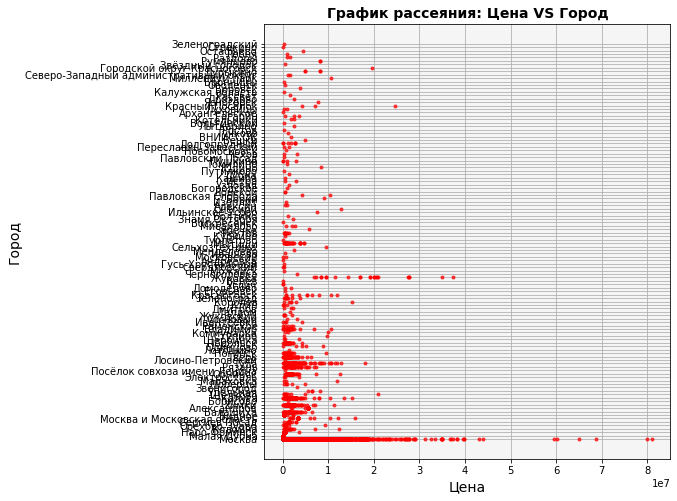

In [83]:
fig = plt.figure(figsize=(16, 8))

plt1 = fig.add_subplot(1,2,1)

plt1.plot(data['Price'],data['Region'], 'r.',alpha=0.7)

plt1.set_xlabel('Цена', fontsize = 14)
plt1.set_ylabel('Город', fontsize = 14)
plt1.set_title('График рассеяния: Цена VS Город', weight = 'bold', fontsize = 14)
plt1.set_facecolor('whitesmoke')
plt1.grid(True)

По данному графику можно видеть, что некоторая взаимосвязь между ценой и городом есть, но присутствует она только в отношении Москвы и Питера, так как именно там продают самые дорогие автомобили. Плюс, можно смело говорить, что линейной взаимосвязи точно нет.

Гипотеза 4 отвергается.

**Гипотеза 5:**
Автомобили, которые имеют большую мощность, имеют более высокую цену на рынке.

Посмотрим на диаграмму рассеяния.

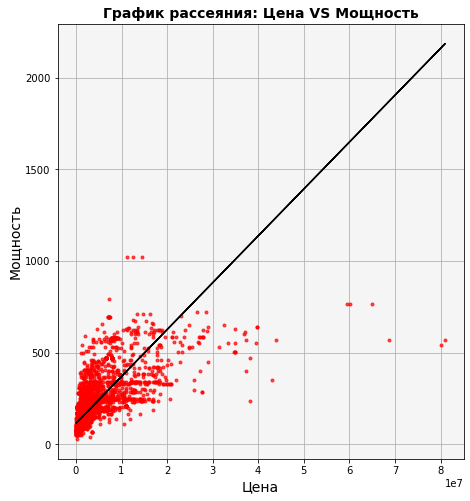

In [84]:
fig = plt.figure(figsize=(16, 8))

plt1 = fig.add_subplot(1,2,1)

plt1.plot(data['Price'],data['Power'], 'r.',alpha=0.7)

plt1.set_xlabel('Цена', fontsize = 14)
plt1.set_ylabel('Мощность', fontsize = 14)
plt1.set_title('График рассеяния: Цена VS Мощность', weight = 'bold', fontsize = 14)
plt1.set_facecolor('whitesmoke')
plt1.grid(True)

coeffs = np.polyfit(data['Price'], data['Power'], 1)
poly_line = np.poly1d(coeffs)
plt1.plot(data['Price'], poly_line(data['Price']), color = 'black')

Действительно, по графику допольно уверенно можно сказать, что зависимость есть (для этого я построила линейную регрессию на графике). Позже, при построении модели, мы посмотрим на коэффициенты и узнаем, насколько сильно мощность влияет на цену.

Можем также посчитать!

In [85]:
from scipy.stats import pearsonr
corr, pval = pearsonr(data['Mileage'], data['Price'])

# Вывод результатов корреляционного анализа
print(f'Коэффициент корреляции: {corr:.3f}')
print(f'P-value: {pval:.3f}')

if pval < 0.05:
    print('Существует статистически значимая зависимость между ценой и мощностью')
else:
    print('Нет статистически значимой зависимости между ценой и мощностью')

Коэффициент корреляции: -0.482
P-value: 0.000
Существует статистически значимая зависимость между ценой и мощностью


Вывод: гипотеза 5 не отвергается.

**Гипотеза 6:** Математическое ожидание цены при условии, что владельцев больше трех, равно математическому ожиданию цены при условии, что владельцев больше двух.

Для проверки данной гипотезы о равенстве математических ожиданий (при неравенстве как альтернативе) я буду использовать t-test, так как реальные дисперсии нам неизвестны. Возьмем уровень значимости в 5%.

In [86]:
df3 = data[data['Number_of_owners'] > 3] # взяла те автомобили, у которых больше трех владельцев было
mean_3 = df3['Price']
print('Средняя цена машин, у которых было более трех владельцев:', np.mean(mean_3))

Средняя цена машин, у которых было более трех владельцев: 331829.5163724654


In [87]:
df2 = data[data['Number_of_owners'] > 2] #а теперь те, у которых больше двух
mean_2 = df2['Price']
print('Средняя цена машин, у которых было более двух владельцев:', np.mean(mean_2))

Средняя цена машин, у которых было более двух владельцев: 854435.2601375746


In [88]:
import scipy.stats as sts

In [89]:
test = sts.ttest_ind(mean_3, mean_2, equal_var=False)
pval = test[1]
print('P-value = ', pval)

P-value =  0.0


P-value получился супер-пупер маленьким, так что наша гипотеза о равенстве математических ожиданий отвергается. На самом деле это вполне очевидно, так как выборочные средние по этим группам ну очень уж разные.

#**Машинное обучение**

В этом разделе мы построим модель для предсказания цены на автомобиль по остальным признакам. Сначала посмотрим на дефолтную линейную регрессию, а потом попробуем другие способы для улучшения.

Я сразу уберу некоторые признаки, которые будут слишком много места, если я их преобразую в количественные. Например, город: 257 новых столбцов явно нам не нужны. Аналогично поступаем с брендом, моделью машины, типом двигателя и др.


In [90]:
data = data.iloc[:, 2:]

In [91]:
from sklearn.preprocessing import OneHotEncoder #сегмент превращаю в количественный признак
data['Сегмент'] = data['Сегмент'].astype('category')
data['Сегмент_новый'] = data['Сегмент'].cat.codes
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(
    data[['Сегмент_новый']]).toarray())
df = data.join(enc_data)
df = df.drop(columns=['Сегмент_новый', 'Сегмент'])
df = df.iloc[:, :-1]

In [92]:
df = df.drop(columns=['Region', 'Brand', 'Type', 'Положение руля', 'Привод', 'Transmission', 'Engine_type', 'Age'])

In [93]:
df

,Custom,Number_of_owners,Year,Price,Mileage,Power,Ежегодный пробег,Средний срок владения,0,1
0,1,4,2000,310000.0,132000.0,79.0,5739.130435,0.089844,1.0,0.0
1,1,1,2022,3500000.0,4000.0,190.0,4000.000000,1.000000,0.0,1.0
2,1,1,2019,8000000.0,14000.0,469.0,3500.000000,4.000000,0.0,0.0
3,1,2,2011,310000.0,25000.0,80.0,2083.333333,3.000000,1.0,0.0
4,1,3,2018,2020000.0,61000.0,150.0,12200.000000,0.185185,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
66928,1,3,2013,2490000.0,120000.0,245.0,12000.000000,0.370370,0.0,0.0
66929,1,1,2019,9700000.0,61000.0,380.0,15250.000000,4.000000,0.0,0.0
66930,1,1,2018,5250000.0,159000.0,265.0,31800.000000,5.000000,0.0,0.0
66931,1,3,2013,2880000.0,96000.0,184.0,9600.000000,0.370370,0.0,0.0


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
import numpy as np
from sklearn.model_selection import GridSearchCV

In [95]:
df = df.rename(columns={0: 'ECONOMY', 1: 'MEDIUM'})

In [96]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=10)


In [97]:
X_train = df_train.drop(columns=['Price'])
X_test = df_test.drop(columns=['Price'])
y_train = df_train['Price']
y_test = df_test['Price']

In [98]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [99]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print('MAE = ', mae)
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE = ', mse)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test,y_pred)
print('R2 = ', r2)

MAE =  931058.7255074156
MSE =  2510633774480.976
R2 =  0.7405669634746502


In [104]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=10)
X_train = df_train.drop(columns=['Price'])
X_test = df_test.drop(columns=['Price'])
y_train = df_train['Price']
y_test = df_test['Price']

from xgboost import XGBRegressor
new_model = XGBRegressor(n_estimators=1000,learning_rate=0.03,random_state=1)
new_model.fit(X_train, y_train)
predictions = new_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, predictions)
print('MAE = ', mae)
mse = metrics.mean_squared_error(y_test, predictions)
print('MSE = ', mse)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, predictions)
print('R2 = ', r2)

#R2 получился очень хороший! Модель существенно лучше!

MAE =  60577.49708585055
MSE =  443858647831.004
R2 =  0.9541344508445329


AttributeError: Coefficients are not defined for Booster type None

Исходя из коэффициентов мы можем понять, что нао

В целом R2 не такой ужасный, но мы попробуем всякие бусты.

Катбуст хорош тем, что в нем мы можем использовать и качественные, и количественные данные.

In [102]:
data = data.iloc[:, :-2]
data = pd.read_csv('https://raw.githubusercontent.com/2deezer2/-Auto-pricing-mashinki-/main/Data.csv')
cat = ['Region', 'Brand', 'Сегмент', 'Type', 'Engine_type', 'Положение руля', 'Привод', 'Transmission']

In [75]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
data

,Custom,Number_of_owners,Year,Price,Region,Mileage,Brand,Сегмент,Power,Type,Engine_type,Положение руля,Привод,Transmission,Ежегодный пробег,Средний срок владения
0,1,4,2000,310000.0,Москва,132000.0,LADA (ВАЗ),ECONOMY,79.0,Внедорожник 3 дв.,GASOLINE,LEFT,ALL_WHEEL_DRIVE,MECHANICAL,5739.130435,0.089844
1,1,1,2022,3500000.0,Москва,4000.0,Skoda,MEDIUM,190.0,Лифтбек,GASOLINE,LEFT,FORWARD_CONTROL,ROBOT,4000.000000,1.000000
2,1,1,2019,8000000.0,Москва,14000.0,Mercedes-Benz,PREMIUM,469.0,Седан Long,GASOLINE,LEFT,ALL_WHEEL_DRIVE,AUTOMATIC,3500.000000,4.000000
3,1,2,2011,310000.0,Москва,25000.0,LADA (ВАЗ),ECONOMY,80.0,Седан,GASOLINE,LEFT,REAR_DRIVE,MECHANICAL,2083.333333,3.000000
4,1,3,2018,2020000.0,Москва,61000.0,Audi,PREMIUM,150.0,Седан,GASOLINE,LEFT,FORWARD_CONTROL,ROBOT,12200.000000,0.185185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66928,1,3,2013,2490000.0,Химки,120000.0,Land Rover,PREMIUM,245.0,Внедорожник 5 дв.,DIESEL,LEFT,ALL_WHEEL_DRIVE,AUTOMATIC,12000.000000,0.370370
66929,1,1,2019,9700000.0,Москва,61000.0,Land Rover,PREMIUM,380.0,Внедорожник 5 дв.,GASOLINE,LEFT,ALL_WHEEL_DRIVE,AUTOMATIC,15250.000000,4.000000
66930,1,1,2018,5250000.0,Москва,159000.0,BMW,PREMIUM,265.0,Внедорожник 5 дв.,DIESEL,LEFT,ALL_WHEEL_DRIVE,AUTOMATIC,31800.000000,5.000000
66931,1,3,2013,2880000.0,Москва,96000.0,BMW,PREMIUM,184.0,Купе,DIESEL,LEFT,ALL_WHEEL_DRIVE,MECHANICAL,9600.000000,0.370370


In [76]:
df_train, df_test = train_test_split(data, test_size = 0.2, random_state=10)
X_train = df_train.drop(columns=['Price'])
X_test = df_test.drop(columns=['Price'])
y_train = df_train['Price']
y_test = df_test['Price']

In [77]:
import catboost
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations = 2000,
                          depth = 8,
                          learning_rate = 0.03,
                         cat_features = cat)
model.fit(X_train, y_train)

0:	learn: 2962534.1292732	total: 308ms	remaining: 10m 15s
1:	learn: 2881773.4873258	total: 422ms	remaining: 7m 1s
2:	learn: 2803120.2213861	total: 552ms	remaining: 6m 7s
3:	learn: 2726953.0547872	total: 689ms	remaining: 5m 44s
4:	learn: 2652742.9875283	total: 814ms	remaining: 5m 24s
5:	learn: 2581879.1591996	total: 926ms	remaining: 5m 7s
6:	learn: 2512824.2240577	total: 1.03s	remaining: 4m 54s
7:	learn: 2446655.7044348	total: 1.17s	remaining: 4m 50s
8:	learn: 2382725.9307839	total: 1.29s	remaining: 4m 45s
9:	learn: 2320695.2966878	total: 1.42s	remaining: 4m 41s
10:	learn: 2260332.8138956	total: 1.52s	remaining: 4m 35s
11:	learn: 2201500.3597092	total: 1.64s	remaining: 4m 32s
12:	learn: 2144694.1314238	total: 1.76s	remaining: 4m 29s
13:	learn: 2089649.2398953	total: 1.88s	remaining: 4m 26s
14:	learn: 2034777.3579447	total: 2.01s	remaining: 4m 26s
15:	learn: 1982521.9203921	total: 2.14s	remaining: 4m 25s
16:	learn: 1932437.6682475	total: 2.27s	remaining: 4m 24s
17:	learn: 1884142.4961988

145:	learn: 428914.2238878	total: 18.3s	remaining: 3m 52s
146:	learn: 427073.8443682	total: 18.4s	remaining: 3m 51s
147:	learn: 425940.5713127	total: 18.5s	remaining: 3m 51s
148:	learn: 425016.4885311	total: 18.6s	remaining: 3m 51s
149:	learn: 423351.3668177	total: 18.7s	remaining: 3m 50s
150:	learn: 422368.8201940	total: 18.9s	remaining: 3m 50s
151:	learn: 421190.7311959	total: 19s	remaining: 3m 50s
152:	learn: 419582.4384861	total: 19.1s	remaining: 3m 50s
153:	learn: 418479.4356493	total: 19.2s	remaining: 3m 50s
154:	learn: 417027.4801135	total: 19.3s	remaining: 3m 50s
155:	learn: 415804.4942007	total: 19.4s	remaining: 3m 49s
156:	learn: 414505.6060202	total: 19.6s	remaining: 3m 49s
157:	learn: 413542.8095371	total: 19.7s	remaining: 3m 49s
158:	learn: 412153.7596780	total: 19.8s	remaining: 3m 49s
159:	learn: 410749.8136747	total: 19.9s	remaining: 3m 49s
160:	learn: 409442.1647024	total: 20s	remaining: 3m 48s
161:	learn: 407683.7939400	total: 20.1s	remaining: 3m 48s
162:	learn: 406967

288:	learn: 316153.1303702	total: 35.7s	remaining: 3m 31s
289:	learn: 315754.9894493	total: 35.8s	remaining: 3m 31s
290:	learn: 315130.5601301	total: 35.9s	remaining: 3m 31s
291:	learn: 314720.5372262	total: 36s	remaining: 3m 30s
292:	learn: 314238.5666567	total: 36.2s	remaining: 3m 30s
293:	learn: 313560.6751818	total: 36.3s	remaining: 3m 30s
294:	learn: 313174.4150513	total: 36.4s	remaining: 3m 30s
295:	learn: 312899.9644452	total: 36.5s	remaining: 3m 30s
296:	learn: 312425.8077167	total: 36.7s	remaining: 3m 30s
297:	learn: 312025.6500639	total: 36.8s	remaining: 3m 30s
298:	learn: 311621.8279356	total: 36.9s	remaining: 3m 29s
299:	learn: 311096.1512312	total: 37s	remaining: 3m 29s
300:	learn: 310487.0992842	total: 37.1s	remaining: 3m 29s
301:	learn: 310191.7005166	total: 37.3s	remaining: 3m 29s
302:	learn: 309761.6700736	total: 37.4s	remaining: 3m 29s
303:	learn: 309226.1250905	total: 37.5s	remaining: 3m 29s
304:	learn: 308960.4576198	total: 37.7s	remaining: 3m 29s
305:	learn: 308487

430:	learn: 266707.9774682	total: 53s	remaining: 3m 12s
431:	learn: 266372.8344955	total: 53.1s	remaining: 3m 12s
432:	learn: 266321.8077138	total: 53.2s	remaining: 3m 12s
433:	learn: 266219.0235280	total: 53.3s	remaining: 3m 12s
434:	learn: 266020.1422830	total: 53.4s	remaining: 3m 12s
435:	learn: 266008.0282620	total: 53.6s	remaining: 3m 12s
436:	learn: 265666.9788985	total: 53.7s	remaining: 3m 12s
437:	learn: 265333.4198287	total: 53.8s	remaining: 3m 11s
438:	learn: 265075.4926719	total: 53.9s	remaining: 3m 11s
439:	learn: 264636.8397010	total: 54.1s	remaining: 3m 11s
440:	learn: 264370.2692419	total: 54.2s	remaining: 3m 11s
441:	learn: 264079.8591575	total: 54.3s	remaining: 3m 11s
442:	learn: 263602.4991466	total: 54.4s	remaining: 3m 11s
443:	learn: 263358.2012462	total: 54.5s	remaining: 3m 11s
444:	learn: 263236.5443582	total: 54.7s	remaining: 3m 11s
445:	learn: 263176.3112270	total: 54.8s	remaining: 3m 10s
446:	learn: 262738.8969625	total: 54.9s	remaining: 3m 10s
447:	learn: 2624

575:	learn: 235261.5091532	total: 1m 10s	remaining: 2m 55s
576:	learn: 235089.5308100	total: 1m 11s	remaining: 2m 55s
577:	learn: 234962.9872482	total: 1m 11s	remaining: 2m 55s
578:	learn: 234850.1417314	total: 1m 11s	remaining: 2m 55s
579:	learn: 234471.6756912	total: 1m 11s	remaining: 2m 54s
580:	learn: 234145.4963203	total: 1m 11s	remaining: 2m 54s
581:	learn: 233991.0630284	total: 1m 11s	remaining: 2m 54s
582:	learn: 233906.1047189	total: 1m 11s	remaining: 2m 54s
583:	learn: 233873.3286211	total: 1m 11s	remaining: 2m 54s
584:	learn: 233583.7873613	total: 1m 12s	remaining: 2m 54s
585:	learn: 233290.1701913	total: 1m 12s	remaining: 2m 54s
586:	learn: 232980.4215436	total: 1m 12s	remaining: 2m 54s
587:	learn: 232907.6299206	total: 1m 12s	remaining: 2m 54s
588:	learn: 232703.9665057	total: 1m 12s	remaining: 2m 53s
589:	learn: 232514.1015518	total: 1m 12s	remaining: 2m 53s
590:	learn: 232257.8263654	total: 1m 12s	remaining: 2m 53s
591:	learn: 232162.9901747	total: 1m 12s	remaining: 2m 5

714:	learn: 216873.6390214	total: 1m 27s	remaining: 2m 37s
715:	learn: 216758.4011173	total: 1m 27s	remaining: 2m 37s
716:	learn: 216491.3923776	total: 1m 28s	remaining: 2m 37s
717:	learn: 216231.8736654	total: 1m 28s	remaining: 2m 37s
718:	learn: 216067.3149972	total: 1m 28s	remaining: 2m 37s
719:	learn: 215954.0076396	total: 1m 28s	remaining: 2m 37s
720:	learn: 215824.7881999	total: 1m 28s	remaining: 2m 37s
721:	learn: 215768.7363209	total: 1m 28s	remaining: 2m 37s
722:	learn: 215725.3795529	total: 1m 28s	remaining: 2m 37s
723:	learn: 215651.7541930	total: 1m 29s	remaining: 2m 36s
724:	learn: 215609.3476974	total: 1m 29s	remaining: 2m 36s
725:	learn: 215537.6565959	total: 1m 29s	remaining: 2m 36s
726:	learn: 215496.1774774	total: 1m 29s	remaining: 2m 36s
727:	learn: 215390.2365743	total: 1m 29s	remaining: 2m 36s
728:	learn: 215342.9773623	total: 1m 29s	remaining: 2m 36s
729:	learn: 215302.3932070	total: 1m 29s	remaining: 2m 36s
730:	learn: 215225.9808770	total: 1m 29s	remaining: 2m 3

853:	learn: 201087.8305274	total: 1m 45s	remaining: 2m 21s
854:	learn: 200990.6972372	total: 1m 45s	remaining: 2m 21s
855:	learn: 200874.3842995	total: 1m 45s	remaining: 2m 21s
856:	learn: 200851.0217506	total: 1m 45s	remaining: 2m 21s
857:	learn: 200813.6101281	total: 1m 45s	remaining: 2m 21s
858:	learn: 200571.4970693	total: 1m 46s	remaining: 2m 20s
859:	learn: 200340.6000581	total: 1m 46s	remaining: 2m 20s
860:	learn: 200304.9649433	total: 1m 46s	remaining: 2m 20s
861:	learn: 200271.6248339	total: 1m 46s	remaining: 2m 20s
862:	learn: 200126.5209236	total: 1m 46s	remaining: 2m 20s
863:	learn: 199940.3794898	total: 1m 46s	remaining: 2m 20s
864:	learn: 199791.2973713	total: 1m 46s	remaining: 2m 20s
865:	learn: 199768.9005738	total: 1m 47s	remaining: 2m 20s
866:	learn: 199617.8712078	total: 1m 47s	remaining: 2m 20s
867:	learn: 199523.6076681	total: 1m 47s	remaining: 2m 19s
868:	learn: 199459.1977037	total: 1m 47s	remaining: 2m 19s
869:	learn: 199207.3327359	total: 1m 47s	remaining: 2m 1

995:	learn: 188036.6620173	total: 2m 2s	remaining: 2m 3s
996:	learn: 188023.3522389	total: 2m 3s	remaining: 2m 3s
997:	learn: 187950.9655649	total: 2m 3s	remaining: 2m 3s
998:	learn: 187804.4487670	total: 2m 3s	remaining: 2m 3s
999:	learn: 187791.6233498	total: 2m 3s	remaining: 2m 3s
1000:	learn: 187716.8643380	total: 2m 3s	remaining: 2m 3s
1001:	learn: 187641.0564478	total: 2m 3s	remaining: 2m 3s
1002:	learn: 187578.6118190	total: 2m 3s	remaining: 2m 3s
1003:	learn: 187507.2945369	total: 2m 3s	remaining: 2m 2s
1004:	learn: 187369.4532440	total: 2m 4s	remaining: 2m 2s
1005:	learn: 187335.7231516	total: 2m 4s	remaining: 2m 2s
1006:	learn: 187287.7993380	total: 2m 4s	remaining: 2m 2s
1007:	learn: 187205.2450678	total: 2m 4s	remaining: 2m 2s
1008:	learn: 187150.2686251	total: 2m 4s	remaining: 2m 2s
1009:	learn: 187075.3508465	total: 2m 4s	remaining: 2m 2s
1010:	learn: 186923.4332351	total: 2m 4s	remaining: 2m 2s
1011:	learn: 186870.4336366	total: 2m 4s	remaining: 2m 2s
1012:	learn: 186754

1135:	learn: 177052.3508325	total: 2m 20s	remaining: 1m 46s
1136:	learn: 176951.1292455	total: 2m 20s	remaining: 1m 46s
1137:	learn: 176897.0916761	total: 2m 20s	remaining: 1m 46s
1138:	learn: 176818.1715670	total: 2m 20s	remaining: 1m 46s
1139:	learn: 176685.6352369	total: 2m 20s	remaining: 1m 45s
1140:	learn: 176649.8989818	total: 2m 20s	remaining: 1m 45s
1141:	learn: 176598.1108127	total: 2m 20s	remaining: 1m 45s
1142:	learn: 176532.2348291	total: 2m 20s	remaining: 1m 45s
1143:	learn: 176404.8728798	total: 2m 21s	remaining: 1m 45s
1144:	learn: 176387.9095144	total: 2m 21s	remaining: 1m 45s
1145:	learn: 176315.8046128	total: 2m 21s	remaining: 1m 45s
1146:	learn: 176262.4991644	total: 2m 21s	remaining: 1m 45s
1147:	learn: 176033.5709454	total: 2m 21s	remaining: 1m 45s
1148:	learn: 176032.1600954	total: 2m 21s	remaining: 1m 44s
1149:	learn: 175946.7719757	total: 2m 21s	remaining: 1m 44s
1150:	learn: 175896.3470567	total: 2m 21s	remaining: 1m 44s
1151:	learn: 175756.7708984	total: 2m 21

1272:	learn: 167389.0487837	total: 2m 36s	remaining: 1m 29s
1273:	learn: 167347.0053932	total: 2m 36s	remaining: 1m 29s
1274:	learn: 167242.8339289	total: 2m 36s	remaining: 1m 28s
1275:	learn: 167207.0423621	total: 2m 36s	remaining: 1m 28s
1276:	learn: 167113.4344864	total: 2m 36s	remaining: 1m 28s
1277:	learn: 167074.4481201	total: 2m 36s	remaining: 1m 28s
1278:	learn: 167041.0647184	total: 2m 36s	remaining: 1m 28s
1279:	learn: 166974.5053587	total: 2m 37s	remaining: 1m 28s
1280:	learn: 166952.4919004	total: 2m 37s	remaining: 1m 28s
1281:	learn: 166892.9921681	total: 2m 37s	remaining: 1m 28s
1282:	learn: 166792.1710757	total: 2m 37s	remaining: 1m 28s
1283:	learn: 166785.5651011	total: 2m 37s	remaining: 1m 27s
1284:	learn: 166725.2833337	total: 2m 37s	remaining: 1m 27s
1285:	learn: 166690.6459843	total: 2m 37s	remaining: 1m 27s
1286:	learn: 166599.1214589	total: 2m 37s	remaining: 1m 27s
1287:	learn: 166567.4556238	total: 2m 38s	remaining: 1m 27s
1288:	learn: 166509.3365403	total: 2m 38

1410:	learn: 160635.1577458	total: 2m 51s	remaining: 1m 11s
1411:	learn: 160604.1175507	total: 2m 52s	remaining: 1m 11s
1412:	learn: 160496.1958166	total: 2m 52s	remaining: 1m 11s
1413:	learn: 160288.8449312	total: 2m 52s	remaining: 1m 11s
1414:	learn: 160258.6591347	total: 2m 52s	remaining: 1m 11s
1415:	learn: 160198.8865358	total: 2m 52s	remaining: 1m 11s
1416:	learn: 160152.9698566	total: 2m 52s	remaining: 1m 11s
1417:	learn: 160152.4933914	total: 2m 52s	remaining: 1m 10s
1418:	learn: 160152.2027694	total: 2m 52s	remaining: 1m 10s
1419:	learn: 160094.7834509	total: 2m 52s	remaining: 1m 10s
1420:	learn: 160051.0266772	total: 2m 52s	remaining: 1m 10s
1421:	learn: 160001.4021823	total: 2m 53s	remaining: 1m 10s
1422:	learn: 159959.0809638	total: 2m 53s	remaining: 1m 10s
1423:	learn: 159920.4595217	total: 2m 53s	remaining: 1m 10s
1424:	learn: 159878.7007529	total: 2m 53s	remaining: 1m 9s
1425:	learn: 159856.7803102	total: 2m 53s	remaining: 1m 9s
1426:	learn: 159842.4147566	total: 2m 53s	

1551:	learn: 151644.9437435	total: 3m 7s	remaining: 54.1s
1552:	learn: 151599.1356004	total: 3m 7s	remaining: 54s
1553:	learn: 151542.2806692	total: 3m 7s	remaining: 53.8s
1554:	learn: 151499.7816385	total: 3m 7s	remaining: 53.7s
1555:	learn: 151414.1815715	total: 3m 7s	remaining: 53.6s
1556:	learn: 151373.7729947	total: 3m 7s	remaining: 53.5s
1557:	learn: 151348.9780903	total: 3m 8s	remaining: 53.4s
1558:	learn: 151345.1325328	total: 3m 8s	remaining: 53.2s
1559:	learn: 151246.1816229	total: 3m 8s	remaining: 53.1s
1560:	learn: 151206.5945657	total: 3m 8s	remaining: 53s
1561:	learn: 151152.7279370	total: 3m 8s	remaining: 52.9s
1562:	learn: 151094.4674576	total: 3m 8s	remaining: 52.7s
1563:	learn: 151042.0941088	total: 3m 8s	remaining: 52.6s
1564:	learn: 151020.2393346	total: 3m 8s	remaining: 52.5s
1565:	learn: 150973.4136343	total: 3m 8s	remaining: 52.4s
1566:	learn: 150932.6540975	total: 3m 9s	remaining: 52.3s
1567:	learn: 150876.6015509	total: 3m 9s	remaining: 52.1s
1568:	learn: 15083

1692:	learn: 145049.4491200	total: 3m 23s	remaining: 36.8s
1693:	learn: 144996.2623097	total: 3m 23s	remaining: 36.7s
1694:	learn: 144967.6640861	total: 3m 23s	remaining: 36.6s
1695:	learn: 144878.4406191	total: 3m 23s	remaining: 36.5s
1696:	learn: 144859.8822919	total: 3m 23s	remaining: 36.4s
1697:	learn: 144825.0295456	total: 3m 23s	remaining: 36.2s
1698:	learn: 144744.0969900	total: 3m 23s	remaining: 36.1s
1699:	learn: 144725.4015321	total: 3m 23s	remaining: 36s
1700:	learn: 144714.4246284	total: 3m 24s	remaining: 35.9s
1701:	learn: 144665.8712722	total: 3m 24s	remaining: 35.8s
1702:	learn: 144574.5767725	total: 3m 24s	remaining: 35.6s
1703:	learn: 144546.9835970	total: 3m 24s	remaining: 35.5s
1704:	learn: 144519.9090639	total: 3m 24s	remaining: 35.4s
1705:	learn: 144376.3931762	total: 3m 24s	remaining: 35.3s
1706:	learn: 144352.4771566	total: 3m 24s	remaining: 35.2s
1707:	learn: 144329.0769680	total: 3m 24s	remaining: 35s
1708:	learn: 144296.8724385	total: 3m 25s	remaining: 34.9s
1

1833:	learn: 138696.6493040	total: 3m 39s	remaining: 19.9s
1834:	learn: 138657.2590798	total: 3m 39s	remaining: 19.7s
1835:	learn: 138644.4916264	total: 3m 39s	remaining: 19.6s
1836:	learn: 138629.6833173	total: 3m 39s	remaining: 19.5s
1837:	learn: 138593.7318620	total: 3m 39s	remaining: 19.4s
1838:	learn: 138517.9774096	total: 3m 39s	remaining: 19.3s
1839:	learn: 138489.2728167	total: 3m 40s	remaining: 19.1s
1840:	learn: 138467.4005895	total: 3m 40s	remaining: 19s
1841:	learn: 138431.5800862	total: 3m 40s	remaining: 18.9s
1842:	learn: 138431.4619926	total: 3m 40s	remaining: 18.8s
1843:	learn: 138399.4928583	total: 3m 40s	remaining: 18.6s
1844:	learn: 138368.6045428	total: 3m 40s	remaining: 18.5s
1845:	learn: 138338.7582659	total: 3m 40s	remaining: 18.4s
1846:	learn: 138256.4720693	total: 3m 40s	remaining: 18.3s
1847:	learn: 138224.7917631	total: 3m 40s	remaining: 18.2s
1848:	learn: 138193.7263215	total: 3m 41s	remaining: 18.1s
1849:	learn: 138121.5770723	total: 3m 41s	remaining: 17.9s

1974:	learn: 133628.9402716	total: 3m 55s	remaining: 2.99s
1975:	learn: 133601.2680060	total: 3m 56s	remaining: 2.87s
1976:	learn: 133551.6330763	total: 3m 56s	remaining: 2.75s
1977:	learn: 133541.8829357	total: 3m 56s	remaining: 2.63s
1978:	learn: 133506.1729102	total: 3m 56s	remaining: 2.51s
1979:	learn: 133478.1350136	total: 3m 56s	remaining: 2.39s
1980:	learn: 133477.1159033	total: 3m 56s	remaining: 2.27s
1981:	learn: 133462.7112489	total: 3m 56s	remaining: 2.15s
1982:	learn: 133440.6475806	total: 3m 57s	remaining: 2.03s
1983:	learn: 133439.6496223	total: 3m 57s	remaining: 1.91s
1984:	learn: 133424.3308211	total: 3m 57s	remaining: 1.79s
1985:	learn: 133424.0970535	total: 3m 57s	remaining: 1.67s
1986:	learn: 133360.6575443	total: 3m 57s	remaining: 1.55s
1987:	learn: 133342.6828557	total: 3m 57s	remaining: 1.43s
1988:	learn: 133325.0235223	total: 3m 57s	remaining: 1.31s
1989:	learn: 133310.2162187	total: 3m 57s	remaining: 1.2s
1990:	learn: 133282.2761085	total: 3m 57s	remaining: 1.07

In [105]:
pred = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, pred)
print('MAE = ', mae)
mse = metrics.mean_squared_error(y_test, pred)
print('MSE = ', mse)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, pred)
print('R2 = ', r2)

MAE =  931058.7255074156
MSE =  2510633774480.976
R2 =  0.7405669634746502
